In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../../GroupProjects/21zpallagi.csv")
df.head()

,STATEFIPS,STATE,zipcode,agi_stub,N1,mars1,MARS2,MARS4,ELF,CPREP,...,N85300,A85300,N11901,A11901,N11900,A11900,N11902,A11902,N12000,A12000
0,1,AL,0,1,720280.0,466930.0,75840.0,165330.0,677820.0,21700.0,...,0.0,0.0,42310.0,35969.0,632780.0,2182999.0,630530.0,2176448.0,2290.0,5215.0
1,1,AL,0,2,524160.0,264900.0,109720.0,134980.0,495550.0,14170.0,...,0.0,0.0,87370.0,115842.0,435160.0,1402396.0,432590.0,1393449.0,3100.0,7423.0
2,1,AL,0,3,291860.0,120090.0,116380.0,46410.0,275270.0,8580.0,...,0.0,0.0,79750.0,165576.0,212390.0,608660.0,209210.0,597461.0,4110.0,11648.0
3,1,AL,0,4,184320.0,48650.0,115740.0,16120.0,173910.0,4010.0,...,0.0,0.0,60450.0,172959.0,122910.0,409261.0,120020.0,397318.0,2690.0,12922.0
4,1,AL,0,5,287720.0,38750.0,234070.0,9640.0,272240.0,7750.0,...,110.0,34.0,128440.0,638854.0,159690.0,678251.0,152450.0,616679.0,8440.0,54805.0


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
files = range(12,22)

complete_df = pd.DataFrame()

for file in files:
    df = pd.read_csv(f"../../GroupProjects/{file}zpallagi.csv")
    df1 = df[df.zipcode==0]
    df1['year'] = f'20{file}'
    complete_df = pd.concat([complete_df,df1]) 
    print(f'{file}zpallagi.csv: {df1.shape}')
complete_df.set_index('year', inplace=True)
complete_df[:5]

12zpallagi.csv: (306, 78)
13zpallagi.csv: (306, 115)
14zpallagi.csv: (306, 128)
15zpallagi.csv: (306, 132)
16zpallagi.csv: (306, 148)
17zpallagi.csv: (306, 154)
18zpallagi.csv: (306, 154)
19zpallagi.csv: (306, 153)
20zpallagi.csv: (306, 166)
21zpallagi.csv: (306, 168)


,STATEFIPS,STATE,zipcode,AGI_STUB,N1,MARS1,MARS2,MARS4,PREP,N2,...,N10970,A10970,N10971,A10971,N10973,A10973,N11520,A11520,N11530,A11530
year,,,,,,,,,,,,,,,,,,,,,
2012,1,AL,0,1.0,889920.0,490850.0,129070.0,256900.0,526740.0,1505430.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,1,AL,0,2.0,491150.0,194370.0,159200.0,123350.0,293480.0,1034650.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,1,AL,0,3.0,254280.0,68160.0,148960.0,31480.0,157230.0,591880.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,1,AL,0,4.0,160160.0,23020.0,126140.0,9030.0,97620.0,420830.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,1,AL,0,5.0,183320.0,15880.0,161260.0,4890.0,110520.0,517060.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Dictionary mapping original column names to shorter names
column_names = {
    'STATE': 'State',
    'zipcode': 'Zip',
    'N1': 'Returns',
    'mars1': 'Single',
    'MARS2': 'Joint',
    'MARS4': 'Hd_of_Hshld',
    'A00100': 'AGI_Amt',
    'N02910': 'Std_Ded_Charity_Returns',
    'A02910': 'Std_Ded_Charity_Amt',
    'N04450': 'Std_Ded_Returns',
    'A04450': 'Std_Ded_Amt',
    'N04470': 'Itemized_Ded_Returns',
    'A04470': 'Itemized_Ded_Amt',
    'N19700': 'Charitable_Returns',
    'A19700': 'Charitable_Amt'
}

# Rename columns
renaming_df = complete_df.rename(columns=column_names)


renaming_df.head(10)

,STATEFIPS,State,Zip,AGI_STUB,Returns,MARS1,Joint,Hd_of_Hshld,PREP,N2,...,N10970,A10970,N10971,A10971,N10973,A10973,N11520,A11520,N11530,A11530
year,,,,,,,,,,,,,,,,,,,,,
2012,1,AL,0,1.0,889920.0,490850.0,129070.0,256900.0,526740.0,1505430.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,1,AL,0,2.0,491150.0,194370.0,159200.0,123350.0,293480.0,1034650.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,1,AL,0,3.0,254280.0,68160.0,148960.0,31480.0,157230.0,591880.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,1,AL,0,4.0,160160.0,23020.0,126140.0,9030.0,97620.0,420830.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,1,AL,0,5.0,183320.0,15880.0,161260.0,4890.0,110520.0,517060.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,1,AL,0,6.0,44840.0,3420.0,40370.0,750.0,34650.0,132000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,2,AK,0,1.0,128930.0,98750.0,13120.0,13880.0,47340.0,154520.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,2,AK,0,2.0,80860.0,44370.0,20740.0,12860.0,31930.0,151400.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,2,AK,0,3.0,51160.0,21860.0,22000.0,5840.0,22760.0,108450.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
renaming_df['new_agi_stub'] = renaming_df.AGI_STUB.fillna(0) + renaming_df.agi_stub.fillna(0)

In [7]:
renaming_df[['AGI_STUB','agi_stub','new_agi_stub']]

,AGI_STUB,agi_stub,new_agi_stub
year,,,
2012,1.0,NaN,1.0
2012,2.0,NaN,2.0
2012,3.0,NaN,3.0
2012,4.0,NaN,4.0
2012,5.0,NaN,5.0
...,...,...,...
2021,NaN,2.0,2.0
2021,NaN,3.0,3.0
2021,NaN,4.0,4.0


In [8]:
temp_columns_to_keep = [
    'State', 'Zip', 'new_agi_stub', 'Returns', 'Single', 'Joint', 'Hd_of_Hshld', 'AGI_Amt',
    'Std_Ded_Charity_Returns', 'Std_Ded_Charity_Amt', 'Std_Ded_Returns', 'Std_Ded_Amt',
    'Itemized_Ded_Returns', 'Itemized_Ded_Amt', 'Charitable_Returns', 'Charitable_Amt'
]

In [9]:
temp_df = renaming_df[temp_columns_to_keep]
temp_df.head()

,State,Zip,new_agi_stub,Returns,Single,Joint,Hd_of_Hshld,AGI_Amt,Std_Ded_Charity_Returns,Std_Ded_Charity_Amt,Std_Ded_Returns,Std_Ded_Amt,Itemized_Ded_Returns,Itemized_Ded_Amt,Charitable_Returns,Charitable_Amt
year,,,,,,,,,,,,,,,,
2012,AL,0,1.0,889920.0,NaN,129070.0,256900.0,11517112.0,NaN,NaN,NaN,NaN,62120.0,850798.0,46490.0,121095.0
2012,AL,0,2.0,491150.0,NaN,159200.0,123350.0,17617800.0,NaN,NaN,NaN,NaN,129230.0,1914481.0,103450.0,358997.0
2012,AL,0,3.0,254280.0,NaN,148960.0,31480.0,15644666.0,NaN,NaN,NaN,NaN,112550.0,1914831.0,96530.0,404644.0
2012,AL,0,4.0,160160.0,NaN,126140.0,9030.0,13885434.0,NaN,NaN,NaN,NaN,91800.0,1770415.0,81870.0,406140.0
2012,AL,0,5.0,183320.0,NaN,161260.0,4890.0,24641055.0,NaN,NaN,NaN,NaN,141580.0,3383365.0,131170.0,849342.0


In [10]:
columns_to_keep = [
    'State', 'new_agi_stub', 'Returns', 'Single', 'Joint', 'Hd_of_Hshld', 'AGI_Amt',
    'Std_Ded_Charity_Returns', 'Std_Ded_Charity_Amt', 'Std_Ded_Returns', 'Std_Ded_Amt',
    'Itemized_Ded_Returns', 'Itemized_Ded_Amt', 'Charitable_Returns', 'Charitable_Amt'
]

In [11]:
filtered_df = renaming_df[columns_to_keep]
# print(filtered_df)
filtered_df[:5]

,State,new_agi_stub,Returns,Single,Joint,Hd_of_Hshld,AGI_Amt,Std_Ded_Charity_Returns,Std_Ded_Charity_Amt,Std_Ded_Returns,Std_Ded_Amt,Itemized_Ded_Returns,Itemized_Ded_Amt,Charitable_Returns,Charitable_Amt
year,,,,,,,,,,,,,,,
2012,AL,1.0,889920.0,NaN,129070.0,256900.0,11517112.0,NaN,NaN,NaN,NaN,62120.0,850798.0,46490.0,121095.0
2012,AL,2.0,491150.0,NaN,159200.0,123350.0,17617800.0,NaN,NaN,NaN,NaN,129230.0,1914481.0,103450.0,358997.0
2012,AL,3.0,254280.0,NaN,148960.0,31480.0,15644666.0,NaN,NaN,NaN,NaN,112550.0,1914831.0,96530.0,404644.0
2012,AL,4.0,160160.0,NaN,126140.0,9030.0,13885434.0,NaN,NaN,NaN,NaN,91800.0,1770415.0,81870.0,406140.0
2012,AL,5.0,183320.0,NaN,161260.0,4890.0,24641055.0,NaN,NaN,NaN,NaN,141580.0,3383365.0,131170.0,849342.0


In [12]:
filtered_df.count()

State                      3060
new_agi_stub               3060
Returns                    3060
Single                     2448
Joint                      3060
Hd_of_Hshld                3060
AGI_Amt                    3060
Std_Ded_Charity_Returns     612
Std_Ded_Charity_Amt         612
Std_Ded_Returns            1224
Std_Ded_Amt                1224
Itemized_Ded_Returns       3060
Itemized_Ded_Amt           3060
Charitable_Returns         3060
Charitable_Amt             3060
dtype: int64

In [33]:
filtered_df.to_csv("Data/combined_zpallagi.csv")

In [13]:
# the years where single filing return counts are not available

filtered_df[filtered_df.Single.isna()].reset_index().groupby('year').count()


,State,new_agi_stub,Returns,Single,Joint,Hd_of_Hshld,AGI_Amt,Std_Ded_Charity_Returns,Std_Ded_Charity_Amt,Std_Ded_Returns,Std_Ded_Amt,Itemized_Ded_Returns,Itemized_Ded_Amt,Charitable_Returns,Charitable_Amt
year,,,,,,,,,,,,,,,
2012,306,306,306,0,306,306,306,0,0,0,0,306,306,306,306
2013,306,306,306,0,306,306,306,0,0,0,0,306,306,306,306


## charitable amounts
## agi amount per bin per state per year

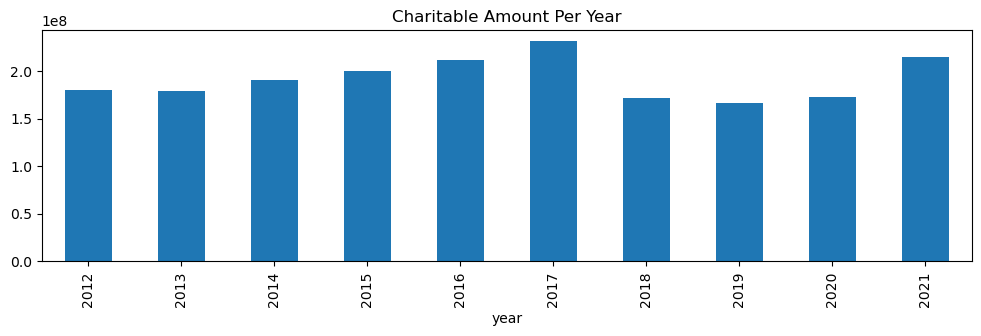

In [14]:
filtered_df.groupby('year').Charitable_Amt.sum().plot.bar(title='Charitable Amount Per Year', figsize=[12,3]);

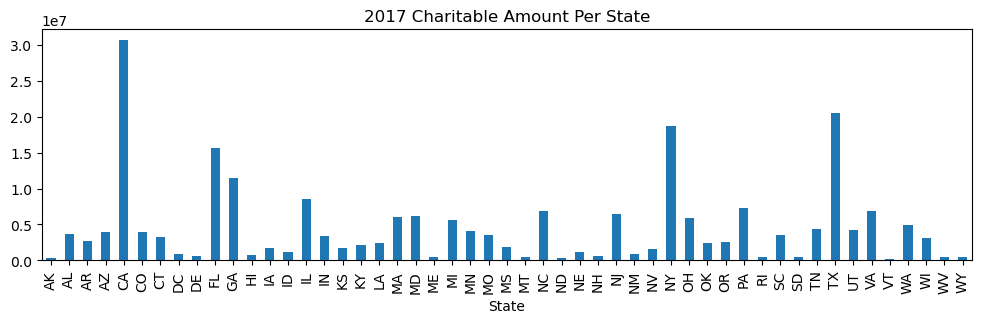

In [15]:
filtered_df[filtered_df.index=='2017'].groupby(['State']).Charitable_Amt.sum().plot.bar(figsize=[12,3],title='2017 Charitable Amount Per State');

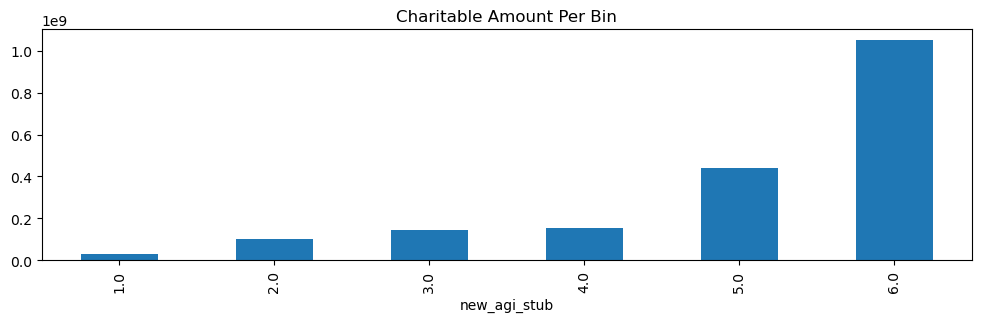

In [16]:
filtered_df.groupby('new_agi_stub').Charitable_Amt.sum().plot.bar(title='Charitable Amount Per Bin', figsize=[12,3]);

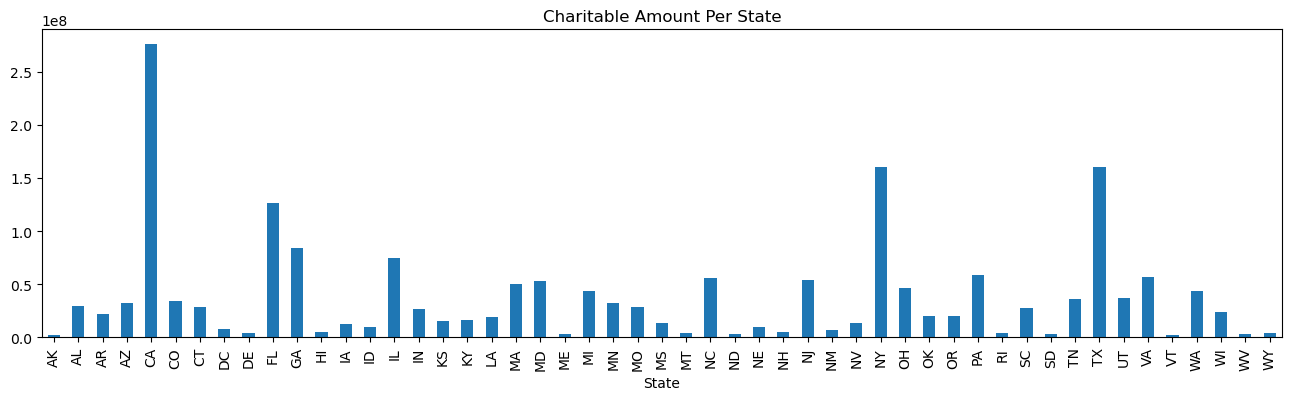

In [17]:
filtered_df.groupby('State').Charitable_Amt.sum().plot.bar(title='Charitable Amount Per State', figsize=[16,4]);

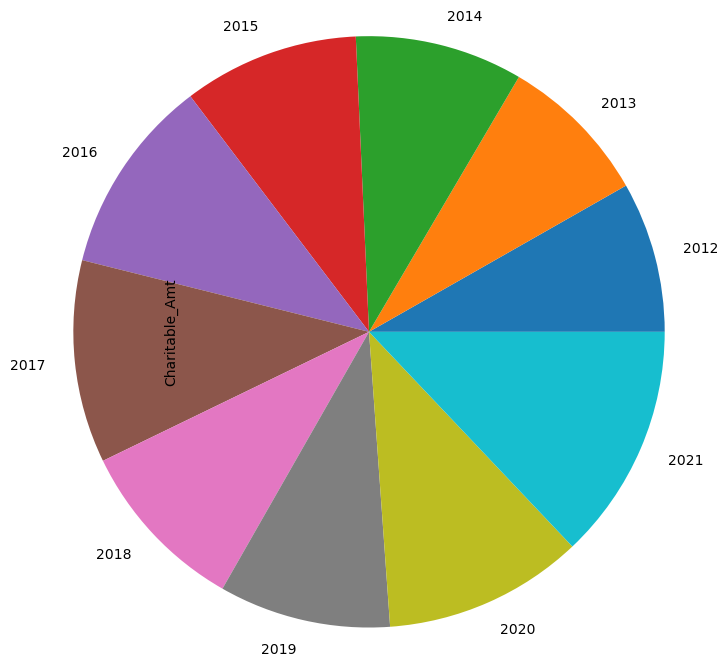

In [18]:
filtered_df[filtered_df.State=='CA'].groupby('year').Charitable_Amt.sum().plot.pie(radius=2);

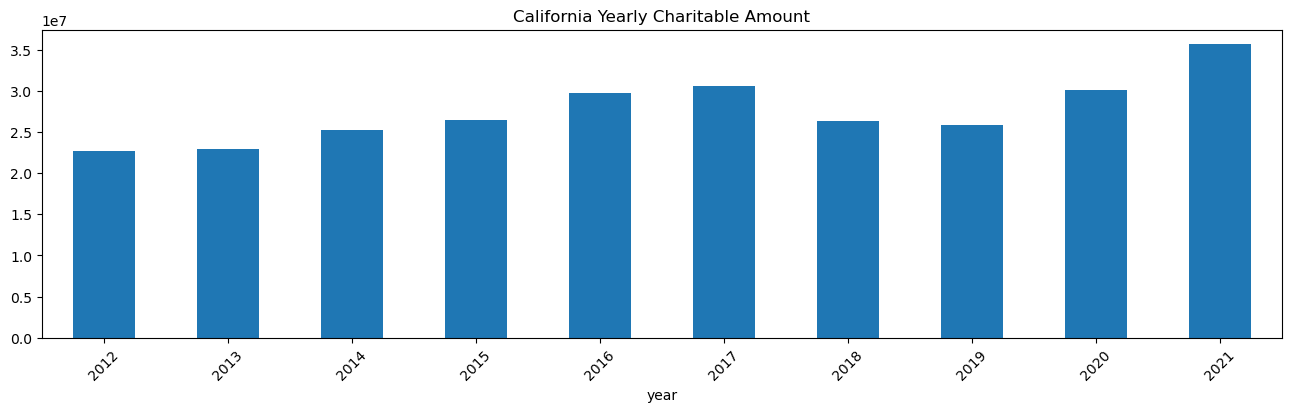

In [19]:
filtered_df[filtered_df.State=='CA'].groupby('year').Charitable_Amt.sum().\
    plot.bar(figsize=[16,4],rot=45,title='California Yearly Charitable Amount');

In [20]:
ca = filtered_df[filtered_df.State=='CA'][['new_agi_stub','Charitable_Amt']]
ca[:5]

,new_agi_stub,Charitable_Amt
year,,
2012,1.0,444698.0
2012,2.0,1377136.0
2012,3.0,2010608.0
2012,4.0,2131998.0
2012,5.0,5388583.0


In [21]:
ca[ca.new_agi_stub==1.0]['Charitable_Amt']

year
2012    444698.0
2013    430089.0
2014    391801.0
2015    410072.0
2016    418660.0
2017    407875.0
2018    164624.0
2019    153512.0
2020    149335.0
2021    126097.0
Name: Charitable_Amt, dtype: float64

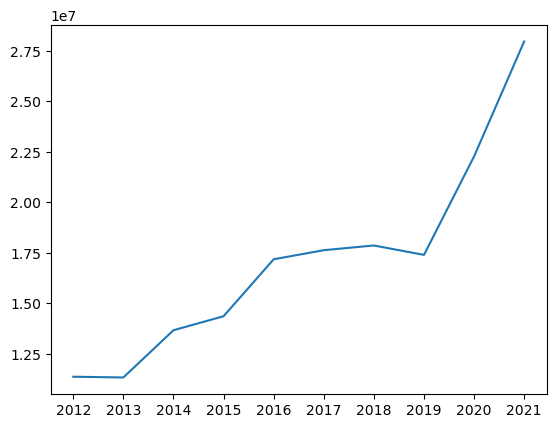

In [22]:
plt.plot(ca[ca.new_agi_stub==6.0]['Charitable_Amt'])

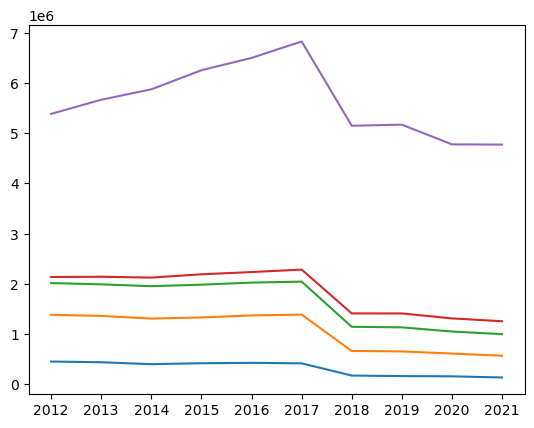

In [23]:
plt.plot(ca[ca.new_agi_stub==1.0]['Charitable_Amt'])
plt.plot(ca[ca.new_agi_stub==2.0]['Charitable_Amt'])
plt.plot(ca[ca.new_agi_stub==3.0]['Charitable_Amt'])
plt.plot(ca[ca.new_agi_stub==4.0]['Charitable_Amt'])
plt.plot(ca[ca.new_agi_stub==5.0]['Charitable_Amt'])

<Axes: xlabel='year'>

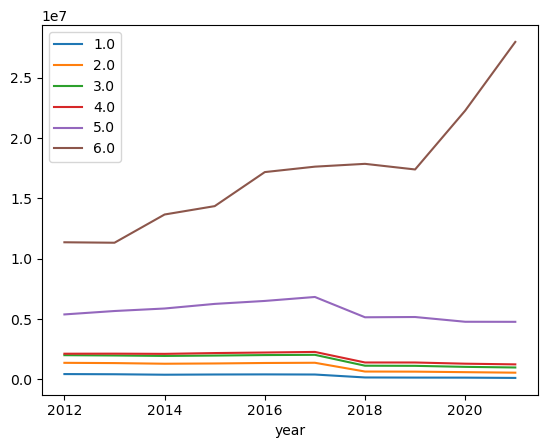

In [24]:
filtered_df[(filtered_df.State=='CA')&(filtered_df['new_agi_stub']==1.0)]['Charitable_Amt'].plot(label='1.0',legend=True)
filtered_df[(filtered_df.State=='CA')&(filtered_df['new_agi_stub']==2.0)]['Charitable_Amt'].plot(label='2.0',legend=True)
filtered_df[(filtered_df.State=='CA')&(filtered_df['new_agi_stub']==3.0)]['Charitable_Amt'].plot(label='3.0',legend=True)
filtered_df[(filtered_df.State=='CA')&(filtered_df['new_agi_stub']==4.0)]['Charitable_Amt'].plot(label='4.0',legend=True)
filtered_df[(filtered_df.State=='CA')&(filtered_df['new_agi_stub']==5.0)]['Charitable_Amt'].plot(label='5.0',legend=True)
filtered_df[(filtered_df.State=='CA')&(filtered_df['new_agi_stub']==6.0)]['Charitable_Amt'].plot(label='6.0',legend=True)


In [25]:
filtered_df[filtered_df.State=='CA'][['State', 'new_agi_stub', 'Charitable_Amt']]

,State,new_agi_stub,Charitable_Amt
year,,,
2012,CA,1.0,444698.0
2012,CA,2.0,1377136.0
2012,CA,3.0,2010608.0
2012,CA,4.0,2131998.0
2012,CA,5.0,5388583.0
2012,CA,6.0,11367131.0
2013,CA,1.0,430089.0
2013,CA,2.0,1355325.0
2013,CA,3.0,1985318.0


In [26]:
# comp_df = pd.concat(complete_data)
# print(comp_df.shape)
# comp_df.head()

In [27]:
# for col in comp_df.columns:
#     print(col)

In [28]:
# df1[['Std_Ded_Charity_Returns', 'Std_Ded_Charity_Amt',
#       'Charitable_Returns', 'Charitable_Amt']].plot.bar()

In [29]:
# df1[['Std_Ded_Charity_Amt','Charitable_Amt']].plot.bar()

In [30]:
# df_count = df1[['State', 'AGI_Range2', 'Returns', 'Single', 'Joint', 'Hd_of_Hshld',
#        'Cap_Gain_Returns', 'Std_Ded_Charity_Returns', 
#        'Itemized_Ded_Returns', 'Total_Taxes_Returns',
#        'Charitable_Returns']]

# df_count.head()

In [31]:

# df_amt=df1[['State', 'AGI_Range2', 'AGI_Amt', 'Total_Income', 'Cap_Gain_Amt',
#        'Std_Ded_Charity_Amt', 'Itemized_Ded_Amt', 'Total_Taxes_Amt', 'Charitable_Amt']]
# df_amt.head()


In [32]:
# df1['$$ avg_charitable_amt'] = (df_amt['Charitable_Amt']/df_count['Charitable_Returns']) 

# df1.head()